## 문서 유사도 - 코사인 유사도

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

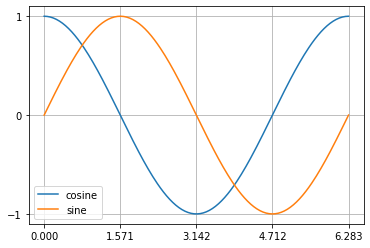

In [2]:
xs = np.linspace(0, 2*np.pi, 200)
cosx = np.cos(xs)
sinx = np.sin(xs)

plt.plot(xs, cosx, label='cosine')
plt.plot(xs, sinx, label='sine')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
plt.yticks([-1,0,1])
plt.grid(), plt.legend()
plt.show()

In [3]:
v1, v2, v3 = np.array([1,1,0]), np.array([2,1,0]), np.array([0,0,1])
v1_norm = np.sqrt(np.sum(np.square(v1)))
v2_norm = np.sqrt(np.sum(np.square(v2)))
v3_norm = np.sqrt(np.sum(np.square(v3)))
v1_norm, v2_norm, v3_norm

(1.4142135623730951, 2.23606797749979, 1.0)

In [4]:
# v1과 v2의 유사도, v1과 v3의 유사도
cos12 = np.dot(v1, v2) / (v1_norm * v2_norm)
cos13 = np.dot(v1, v3) / (v1_norm * v3_norm)
cos12, cos13

(0.9486832980505138, 0.0)

In [5]:
def cos_similarity(v1, v2):
    v1_norm = np.sqrt(np.sum(np.square(v1)))
    v2_norm = np.sqrt(np.sum(np.square(v2)))
    return np.dot(v1, v2) / (v1_norm * v2_norm)

- 문장의 코사인 유사도

In [6]:
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cvect = CountVectorizer()
doc_cv = cvect.fit_transform(doc_list)
doc_cv.toarray()

array([[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2]],
      dtype=int64)

In [9]:
d1, d2, d3 = doc_cv.toarray()
d1

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1], dtype=int64)

In [10]:
print(f'문장1 vs 문장2: {cos_similarity(d1,d2):.4f}')
print(f'문장1 vs 문장3: {cos_similarity(d1,d3):.4f}')
print(f'문장2 vs 문장3: {cos_similarity(d2,d3):.4f}')

문장1 vs 문장2: 0.6093
문장1 vs 문장3: 0.6396
문장2 vs 문장3: 0.6804


In [15]:
tvect = TfidfVectorizer()
doc_tv = tvect.fit_transform(doc_list)
doc_tv.toarray()

array([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
        0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
        0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
        0.49087711, 0.        , 0.24543856],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
        0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
        0.23402865, 0.39624495, 0.4680573 ],
       [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
        0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
        0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
        0.3660119 , 0.        , 0.3660119 ]])

In [16]:
d1, d2, d3 = doc_tv.toarray()
print(f'문장1 vs 문장2: {cos_similarity(d1,d2):.4f}')
print(f'문장1 vs 문장3: {cos_similarity(d1,d3):.4f}')
print(f'문장2 vs 문장3: {cos_similarity(d2,d3):.4f}')

문장1 vs 문장2: 0.4021
문장1 vs 문장3: 0.4043
문장2 vs 문장3: 0.4565


- Scikit-learn 코사인 유사도

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity([d1], [d2])

In [ ]:
cosine_similarity(doc_cv)

In [ ]:
cosine_similarity(doc_tv, doc_tv)